<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/Makine_%C3%96%C4%9Frenimi_ile_Hata_Tahmini_ve_%C3%96nleme(kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files


!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Örnek veri seti: Predictive Maintenance Dataset
!kaggle datasets download -d shivamb/machine-predictive-maintenance-classification
!unzip machine-predictive-maintenance-classification.zip

📌 Model Performansı:
RMSE: 0.4962916868987902
R2 Score: 0.9975708761341714


<ipython-input-8-cab0f04e3d29>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


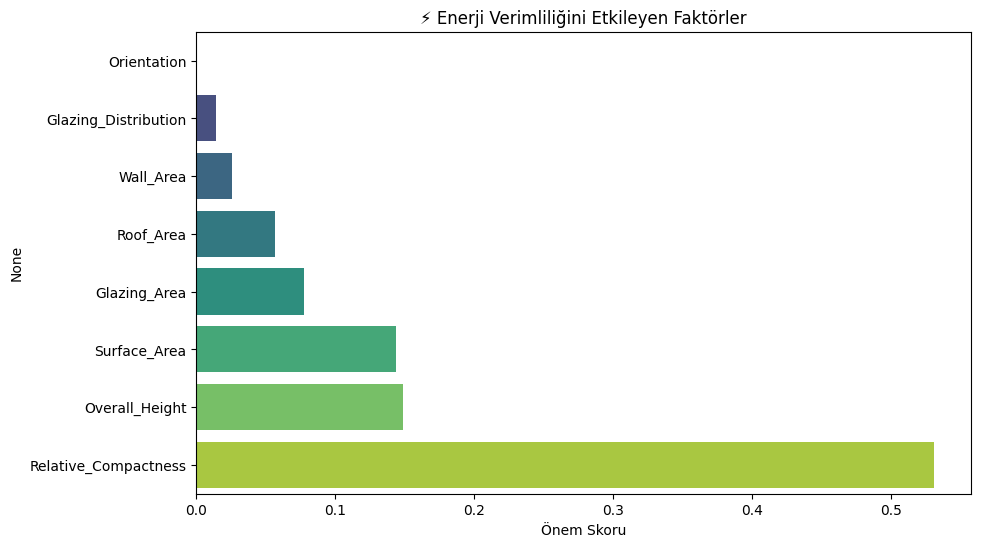

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Veriyi yükle
df = pd.read_csv("ENB2012_data.csv")  # Energy Efficiency veri seti
df.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
              'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Distribution',
              'Heating_Load', 'Cooling_Load']  # Sütun isimlerini düzenle

# Veri Ön İşleme
X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y = df['Heating_Load']  # Isıtma Yükü hedef değişken (Cooling_Load de kullanılabilir)

# Eğitim-Test Ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizasyon
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Eğitimi (Regresyon için RandomForest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tahminler
y_pred = model.predict(X_test)

# Sonuçlar
print("📌 Model Performansı:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

# Özellik Önem Sıralaması
plt.figure(figsize=(10, 6))
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values()
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.title("⚡ Enerji Verimliliğini Etkileyen Faktörler")
plt.xlabel("Önem Skoru")
plt.show()

📌 Sonuçların Yorumlanması
RMSE (Root Mean Squared Error): Tahmin hatalarının ortalaması (Ne kadar düşükse o kadar iyi).

R2 Score: Modelin açıklayıcılık gücü (1'e ne kadar yakınsa o kadar iyi).

Önemli Faktörler: Grafikte en sağdaki değişkenler (örn: Overall_Height, Relative_Compactness) en kritik verimlilik belirleyicileridir.

📈 İleri Analiz Önerileri
Cooling_Load için aynı model

In [ ]:
y = df['Cooling_Load']  # Hedef değişkeni değiştirip tekrar çalıştırın

Hiperparametre Optimizasyonu:



In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)
print("En iyi parametreler:", grid_search.best_params_)

En iyi parametreler: {'max_depth': None, 'n_estimators': 50}



1. Çapraz Doğrulama (Cross-Validation) ile Model Stabilitesini Test Edin

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Çapraz Doğrulama R2 Skorları:", scores)
print("Ortalama R2:", np.mean(scores))

Çapraz Doğrulama R2 Skorları: [0.91143375 0.95776978 0.98265983 0.97312547 0.96279074]
Ortalama R2: 0.9575559143820115


2. Farklı Modelleri Karşılaştırın (XGBoost, SVM, Neural Networks)


In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
print("XGBoost R2:", r2_score(y_test, xgb_model.predict(X_test)))

XGBoost R2: 0.9985727555590409



3. Feature Engineering ile Yeni Özellikler Üretin


In [ ]:
# Örneğin: Duvar alanı / Çatı alanı oranı
df['Wall_to_Roof_Ratio'] = df['Wall_Area'] / df['Roof_Area']
# Yeniden modeli eğitin ve sonuçları karşılaştırın

4. SHAP ile Modeli Yorumlayın (Hangi Faktörler Nasıl Etkiliyor?)


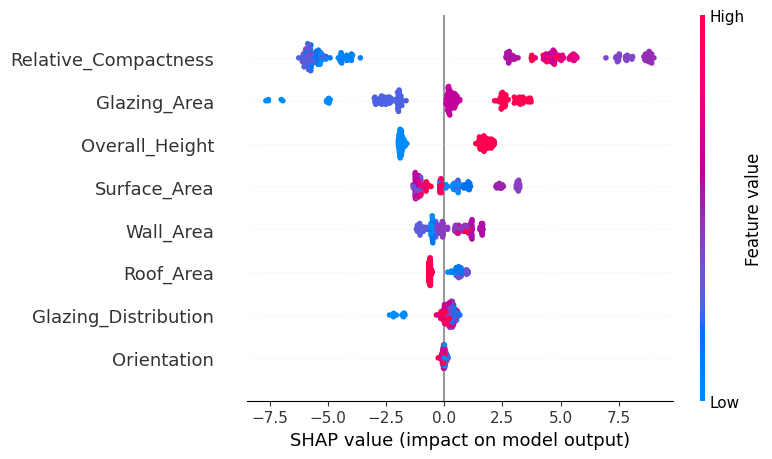

In [ ]:
!pip install shap
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
